# Experiments Results

In [9]:
from src.utils import plot_score_vs_nshots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## GPT2-XL (1.5B) on TREC, SST-2, AGNews and DBPedia

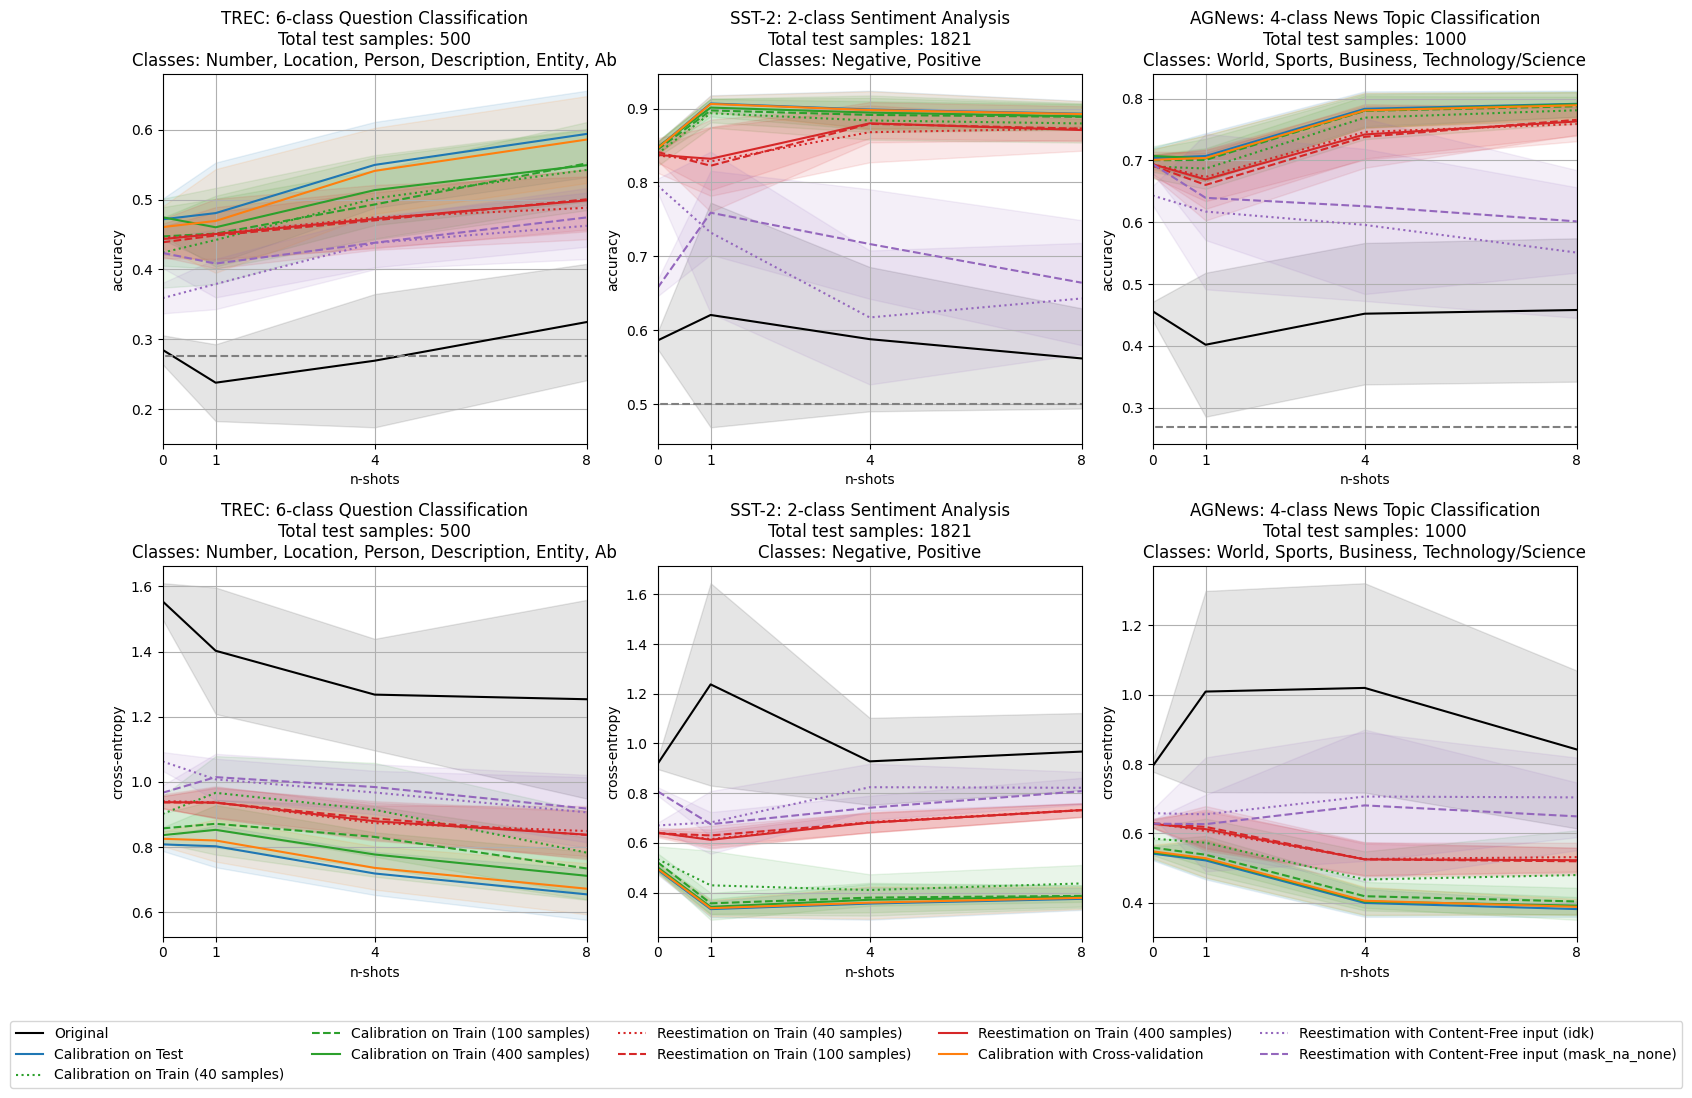

In [13]:
root_dir = "./"
experiment = "gpt2-xl_trec_sst2_agnews_dbpedia"
calibration = "logloss_scale_100boots"

# !python run_model.py --root_dir $root_dir --config $experiment --use_saved_results
# !python run_calibration.py --root_dir $root_dir --experiment $experiment --config $calibration_config --use_saved_results

prob_types = None
datasets = ["trec", "sst2", "agnews"]
prob_types = [
    "test_probs_original",
    "test_probs_cal_peaky",
    "test_probs_cal_train_40",
    "test_probs_cal_train_100",
    "test_probs_cal_train_400",
    "test_probs_reest_train_40",
    "test_probs_reest_train_100",
    "test_probs_reest_train_400",
    "test_probs_cal_xval",
    "test_probs_reest_cf_idk",
    "test_probs_reest_cf_mask_na_none"
]
plot_score_vs_nshots(root_dir, experiment, calibration, plot="line", prob_types=prob_types, datasets=datasets)

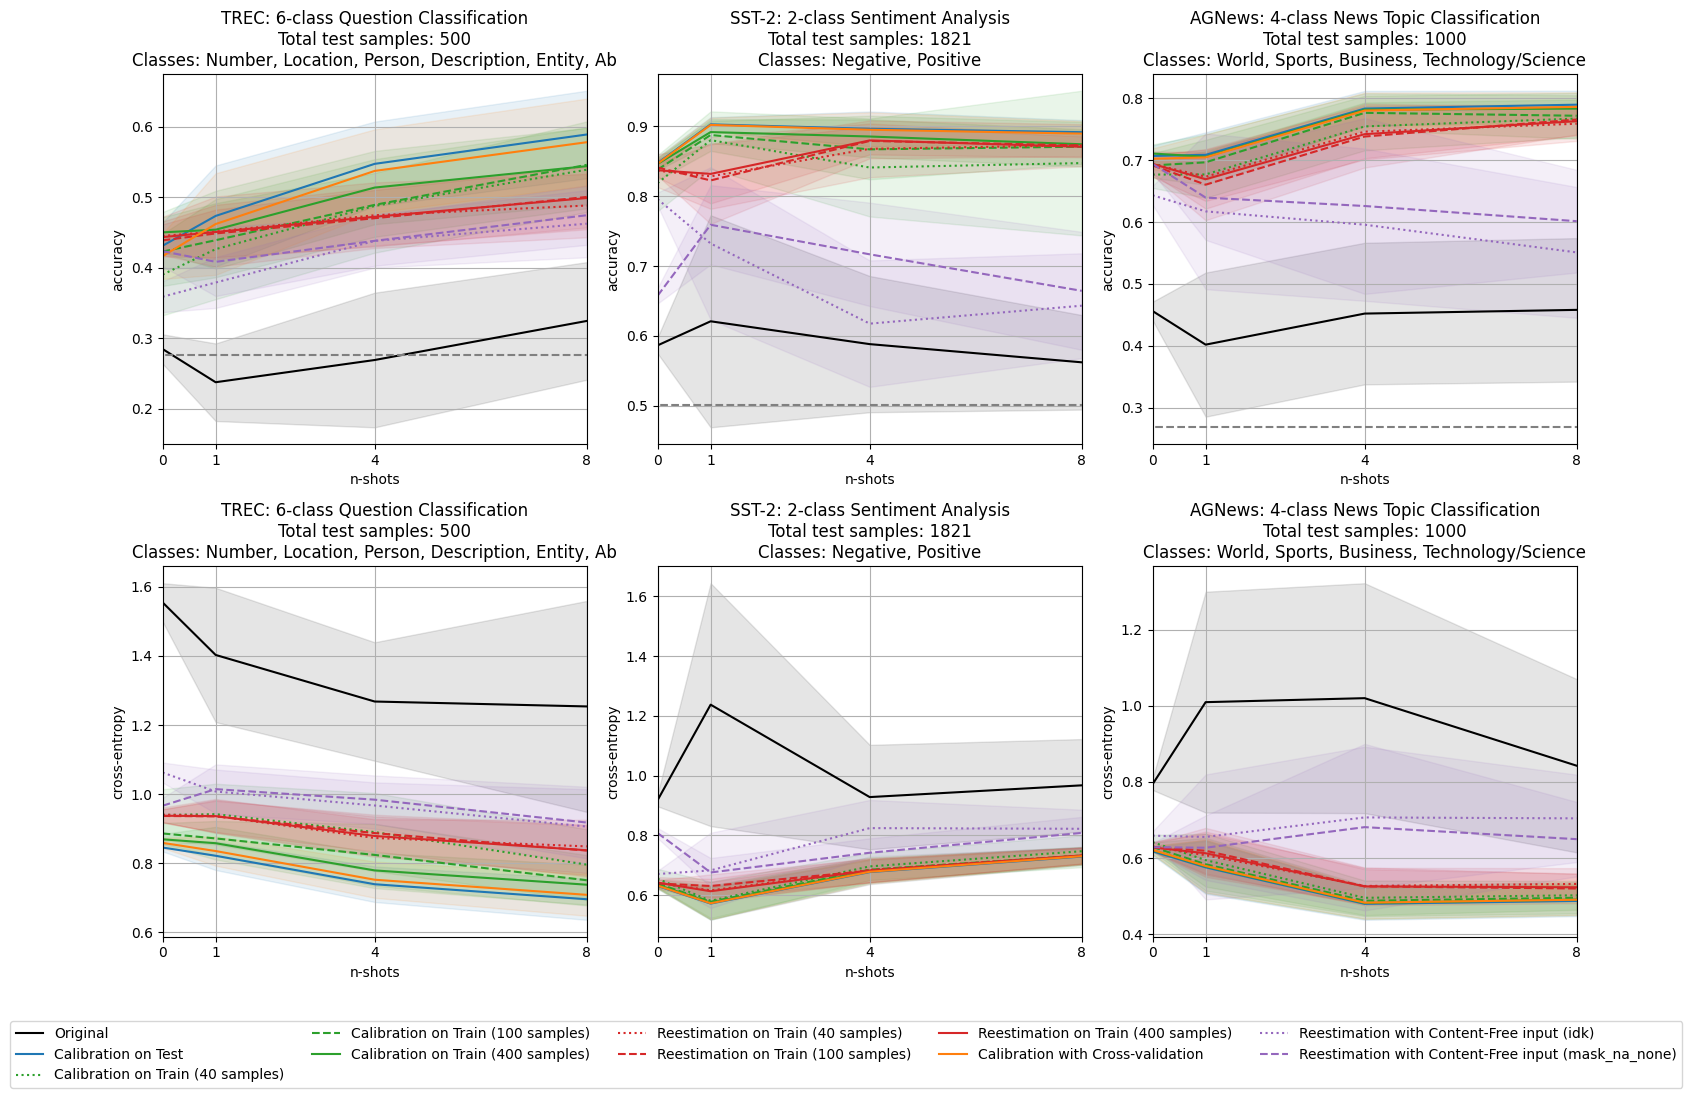

In [15]:
root_dir = "./"
experiment = "gpt2-xl_trec_sst2_agnews_dbpedia"
calibration = "logloss_noscale_100boots"

# !python run_model.py --root_dir $root_dir --config $experiment --use_saved_results
# !python run_calibration.py --root_dir $root_dir --experiment $experiment --config $calibration_config --use_saved_results

prob_types = None
datasets = ["trec", "sst2", "agnews"]
prob_types = [
    "test_probs_original",
    "test_probs_cal_peaky",
    "test_probs_cal_train_40",
    "test_probs_cal_train_100",
    "test_probs_cal_train_400",
    "test_probs_reest_train_40",
    "test_probs_reest_train_100",
    "test_probs_reest_train_400",
    "test_probs_cal_xval",
    "test_probs_reest_cf_idk",
    "test_probs_reest_cf_mask_na_none"
]
plot_score_vs_nshots(root_dir, experiment, calibration, plot="line", prob_types=prob_types, datasets=datasets)

In [8]:
import json
from src.utils import get_results_ids_from_config, parse_calibration_args
import pickle
import numpy as np

root_dir = "./"
config = "gpt2-xl_trec_sst2_agnews_dbpedia"

with open(f"{root_dir}/configs/models/{config}.json", "r") as f:
    config = json.load(f)
results_ids = get_results_ids_from_config(root_dir, config)

for result_id in results_ids:
    with open(f"{root_dir}/results/calibrated/{result_id}.pkl", "rb") as f:
        results = pickle.load(f)
    for r in results:
        assert (r["test_probs_original"] < 1e-16).sum() == 0
        assert (r["test_probs_cal_peaky"] < 1e-16).sum() == 0
        # assert (r["test_probs_cal_train_10"] < 1e-16).sum() == 0
        assert (r["test_probs_cal_train_100"] < 1e-16).sum() == 0
        assert (r["test_probs_cal_train_400"] < 1e-16).sum() == 0
        assert (r["test_probs_reest_train_10"] < 1e-16).sum() == 0
        assert (r["test_probs_reest_train_100"] < 1e-16).sum() == 0
        assert (r["test_probs_reest_train_400"] < 1e-16).sum() == 0
        assert (r["test_probs_cal_xval"] < 1e-16).sum() == 0
        assert (r["test_probs_reest_cf_idk"] < 1e-16).sum() == 0
        assert (r["test_probs_reest_cf_mask_na_none"] < 1e-16).sum() == 0

In [21]:
with open(f"{root_dir}/results/train_test/{result_id}/train.pkl", "rb") as f:
    results = pickle.load(f)

results.keys()

dict_keys(['train_labels', 'train_probs', 'train_queries', 'train_queries_truncated', 'train_shots_truncated'])